In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from penai.registries.projects import SavedPenpotProject
from penai.registries.web_drivers import RegisteredWebDriver
from penai.render import WebDriverSVGRenderer

# Design elements to text

In this notebook we will demonstrate how to get various textual outputs from design elements. The
textual outputs can be useful either directly for penpot users (naming groups, elements, or proposing grouping 
hierarchies) or indirectly (for creating design variations in the text space prior to converting them back to
design elements).

First we need to load a penpot project into python and extract the design element as rasters (since current visual
language models do not understand vector graphics sufficiently well).

In [3]:
penpot_project = SavedPenpotProject.INTERACTIVE_MUSIC_APP.load(pull=True)
main_file = penpot_project.get_main_file()
main_file.page_names

Scanning remote paths in penpot/data/raw/designs/Interactive music app: 100%|██████████| 8/8 [00:00<00:00, 1132.18it/s]
force pulling (bytes): 100%|██████████| 1457540/1457540 [00:00<00:00, 2173470.41it/s]


['Cover', 'Getting started', 'Interactive music app', 'Main components']

## Exploring a page and its elements

Let's have a look at the whole render, the shapes, and the components of the "Interactive music app" page

In [4]:
selected_page = main_file.get_page_by_name("Interactive music app")

In [6]:
with WebDriverSVGRenderer.create_chrome_renderer() as renderer:
    page_img = renderer.render_svg(selected_page.svg).image

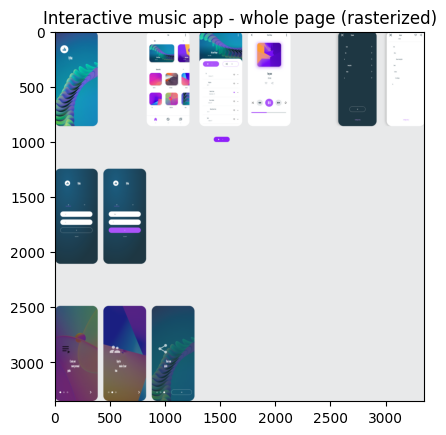

In [8]:
plt.imshow(page_img)
plt.title("Interactive music app - whole page (rasterized)")
plt.show()

In [9]:
top_level_shapes = selected_page.svg.get_shape_elements_at_depth(0)
top_level_shape_names = [shape.name for shape in top_level_shapes]
print(
    "At the highest level in the hierarchy we have the following shapes: \n"
    f"{top_level_shape_names}",
)

At the highest level in the hierarchy we have the following shapes: 
['button-hover', 'Onboarding-3', 'Onboarding-2', 'Onboarding-1', 'Login-filled', 'Login', 'Song-menu', 'Account-menu', 'Song', 'Playlist', 'Home', 'Splash']


We can print the shape hierarchy to get a quick overview of the structure of the page.

In [10]:
selected_page.svg.pprint_hierarchy()

 button-hover┐
             │           ┌bg-6
             └btn-primary┤
                         │      ┌Text-46
                         └center┤
                                │                    ┌svg-path-35
                                └ic_play_arrow_48px-1┤
                                                     └svg-path-36
             ┌Text-36
             ├Circle-10
             ├Circle-11
             ├Circle-12
             ├bg-17┐
             │     └bg
 Onboarding-3┤
             │               ┌svg-path-108
             ├ic_share_48px-2┤
             │               └svg-path-109
             │          ┌bg-13
             ├btn-menu-7┤
             │          └Text-53
             │        ┌cover-mask-10
             └Group-16┤
                      └image.png-52
             ┌Text-34
             ├Circle-7
             ├Circle-8
             ├Circle-9
             ├bg-16┐
             │     └bg-1
 Onboarding-2┤
             │       ┌bg-19
             ├Group-9┤
     

Let's select the 'Playlist' shape for a closer look. First, we will assign a view box to all shapes in the page.
In principle, it is possible to also retrieve the view boxes for each shape individually, but it
is faster to assign the view box to all shapes at once than to iterate (which will require a re-render).

In [11]:
playlist_shape = selected_page.svg.get_shape_by_name("Playlist")
selected_page.svg.retrieve_and_set_view_boxes_for_shape_elements(RegisteredWebDriver.CHROME)

Setting view boxes: 100%|██████████| 397/397 [00:03<00:00, 106.74it/s]


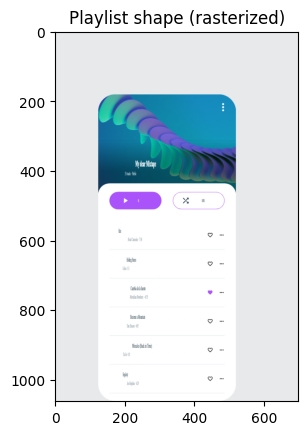

In [12]:
with WebDriverSVGRenderer.create_chrome_renderer() as renderer:
    playlist_img = renderer.render_svg(playlist_shape.to_svg()).image

plt.imshow(playlist_img)
plt.title("Playlist shape (rasterized)")
plt.show()